In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
data_train='/content/drive/MyDrive/Colab Notebooks/12LOAITIENVIETNAM/TRAIN'
data_validation='/content/drive/MyDrive/Colab Notebooks/12LOAITIENVIETNAM/TEST'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
traindata=train.flow_from_directory(data_train,
                                    target_size=(150,150),
                                    batch_size=10,
                                    class_mode='categorical',)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',)

Found 84 images belonging to 12 classes.
Found 37 images belonging to 12 classes.


In [4]:
print(traindata.class_indices)
print(validationdata.class_indices)

{'100D': 0, '100K': 1, '10K': 2, '1K': 3, '200D': 4, '200K': 5, '20K': 6, '2K': 7, '500D': 8, '500K': 9, '50K': 10, '5K': 11}
{'100D': 0, '100K': 1, '10K': 2, '1K': 3, '200D': 4, '200K': 5, '20K': 6, '2K': 7, '500D': 8, '500K': 9, '50K': 10, '5K': 11}


In [7]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=10,verbose=1,validation_data=validationdata)

Epoch 1/10
9/9 [==============================] - 7s 705ms/step - loss: 14.1965 - accuracy: 0.4762 - val_loss: 4.7073 - val_accuracy: 0.3514
Epoch 2/10
9/9 [==============================] - 6s 673ms/step - loss: 0.2320 - accuracy: 0.9762 - val_loss: 4.6765 - val_accuracy: 0.3514
Epoch 3/10
9/9 [==============================] - 6s 676ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 5.3854 - val_accuracy: 0.4054
Epoch 4/10
9/9 [==============================] - 6s 677ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 5.6370 - val_accuracy: 0.3514
Epoch 5/10
9/9 [==============================] - 6s 676ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.8147 - val_accuracy: 0.3784
Epoch 6/10
9/9 [==============================] - 6s 669ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.9812 - val_accuracy: 0.3784
Epoch 7/10
9/9 [==============================] - 6s 678ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.1788 - val_accuracy: 0.3784
Epoch 8/10
9/9 [===

In [9]:
model.save('12LOAITIENGIAYVIETNAM.h5')

array([11])

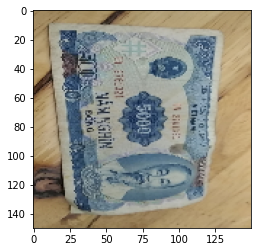

In [10]:
img=load_img('/content/z3427562844832_e9a9e4f9f7dc57318cf32c972957bf84.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

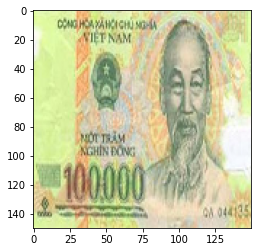

In [16]:
img=load_img('/content/imV5vplW.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)